# <center> NUMERICAL ANALYSIS

## <span style='color:blue'> Theme 5 - Numerical Methods for Nonlinear Systems

#### <span style='color:red'> [5.1] Single Variable Fixed Point Method

<img src="pics/svFP.png" alt="Drawing" style="width: 500px;margin-center: auto; margin-center: 0;"/>

In [7]:
from pylab import plot,show
from numpy import array,linspace,sqrt,sin
from numpy.linalg import norm

def fixedp(f,x0,tol,N0):
    e = 1
    i = 0                              #Step 1
    xp = []
    while(e > tol and i < N0):         #Step 2
        x = f(x0)                      #Step 3: fixed point equation
        e = norm(x0-x)                 #Step 4: error at the current step
        x0 = x                           
        xp.append(x0)
        i = i + 1                      #Step 5
    return x,xp

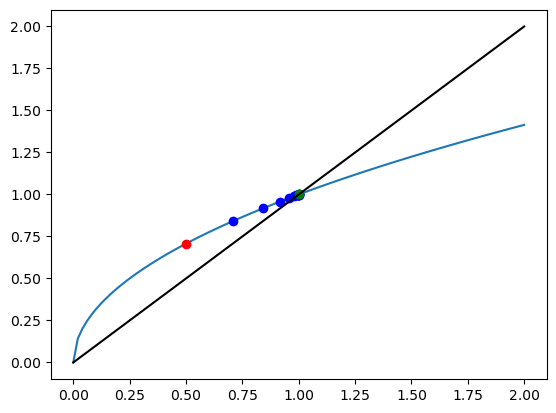

In [8]:
#Let's find the fixed point of the square root funtion starting from x = 0.5 and plot the result
f = lambda x : sqrt(x)
x_start = .5
tol = 10e-5
N0=100

xf,xp = fixedp(f,x_start,tol,N0)

x = linspace(0,2,100)
y = f(x)
plot(x,y,xp,f(xp),'bo',
     x_start,f(x_start),'ro',xf,f(xf),'go',x,x,'k')
show()

#### <span style='color:red'> [5.2] Multi-Variable Fixed Point Method

Use the fixed-point iteration method with $\varepsilon_s$=0.0001 to find the solution to the following nonlinear system of equations: $x_1^2 + x_1x_2 = 10, x_2 + 3x_1x_2^2 = 57$

In [10]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
xtable = np.array([[1, 1,-1]]) #initial guess
ErrorTable = [1]
Nmax = 100
eps = 0.00001
i = 1
while ErrorTable[i - 1] > eps and i <= Nmax: 
    x1new = 1/3*np.cos(xtable[i - 1, 1]*xtable[i - 1, 2])+1/6
    x2new = 1/9*np.sqrt((xtable[i - 1, 0])**2+np.sin(xtable[i - 1, 2])+1.06)-0.1 
    x3new = -1/20*np.exp(-1*xtable[i - 1, 0]*xtable[i - 1, 1])+(-10*np.pi-3)/60
    xnew = [x1new, x2new, x3new]
    xtable = np.concatenate((xtable,[xnew])) 
    er = np.linalg.norm(xnew - xtable[i - 1])/np.linalg.norm(xnew) 
    ErrorTable.append(er)
    i += 1
T2 = [[i+1, xtable[i][0], xtable[i][1], xtable[i][2], xtable[i + 1][0], xtable[i + 1][1],xtable[i + 1][2], ErrorTable[i + 1]] for i in range(len(xtable)-1)]
pd.DataFrame(T2, columns=["Iter", "x1_in", "x2_in","x3_in", "x1_out", "x2_out","x3_out", "Er"])

,Iter,x1_in,x2_in,x3_in,x1_out,x2_out,x3_out,Er
0,1,1.000000,1.000000,-1.000000,0.346767,0.022652,-0.591993,1.812718e+00
1,2,0.346767,0.022652,-0.591993,0.499970,-0.012354,-0.623208,2.005099e-01
2,3,0.499970,-0.012354,-0.623208,0.499990,-0.005306,-0.623909,8.858434e-03
3,4,0.499990,-0.005306,-0.623909,0.499998,-0.005342,-0.623732,2.260718e-04
4,5,0.499998,-0.005342,-0.623732,0.499998,-0.005332,-0.623732,1.242395e-05
5,6,0.499998,-0.005332,-0.623732,0.499998,-0.005332,-0.623732,3.163045e-07


#### <span style='color:red'> [5.3] Steepest Descent Method

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def steepest_descent(gradient, x0 = np.zeros(2), alpha = 0.01, max_iter = 10000, tolerance = 1e-10): 
    '''
    Steepest descent with constant step size alpha.
    
    Args:
      - gradient: gradient of the objective function
      - alpha: line search parameter (default: 0.01)
      - x0: initial guess for x_0 and x_1 (default values: zero) <numpy.ndarray>
      - max_iter: maximum number of iterations (default: 10000)
      - tolerance: minimum gradient magnitude at which the algorithm stops (default: 1e-10)
    
    Out:
      - results: <numpy.ndarray> of size (n_iter, 2) with x_0 and x_1 values at each iteration
    '''
    
    # Initialize the iteration counter
    iter_count = 1
    
    # Prepare list to store results at each iteration 
    results = np.array([])
    
    # Evaluate the gradient at the starting point 
    gradient_x = gradient(x0)
    
    # Set the initial point 
    x = x0 
    results = np.append(results, x, axis=0)
   
    # Iterate until the gradient is below the tolerance or maximum number of iterations is reached
    # Stopping criterion: inf norm of the gradient (max abs)
    while any(abs(gradient_x) > tolerance) and iter_count < max_iter:
        
        # Update the current point by moving in the direction of the negative gradient 
        x = x - alpha * gradient_x
        
        # Store the result
        results = np.append(results, x, axis=0)
        
        # Evaluate the gradient at the new point 
        gradient_x = gradient(x) 
        
        # Increment the iteration counter 
        iter_count += 1 
        
    # Return the points obtained at each iteration
    return results.reshape(-1, 2)

In [51]:
def f(x):
    '''Objective function'''
    return 0.5*(x[0] - 4.5)**2 + 2.5*(x[1] - 2.3)**2

def df(x):
    '''Gradient of the objective function'''
    return np.array([x[0] - 4.5, 5*(x[1] - 2.3)])

result = minimize(
    f, np.zeros(2), method='trust-constr', jac=df)

# Prepare the objective function between -10 and 10
X, Y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
Z = f(np.array([X, Y]))

# Minimizer
min_x0, min_x1 = np.meshgrid(result.x[0], result.x[1])   
min_z = f(np.stack([min_x0, min_x1]))

estimate = steepest_descent(df, x0 = np.array([-9, -9]), alpha=0.30)

print('Final results: {}'.format(estimate[-1]))
print('N° iterations: {}'.format(len(estimate)))

Final results: [4.5 2.3]
N° iterations: 73


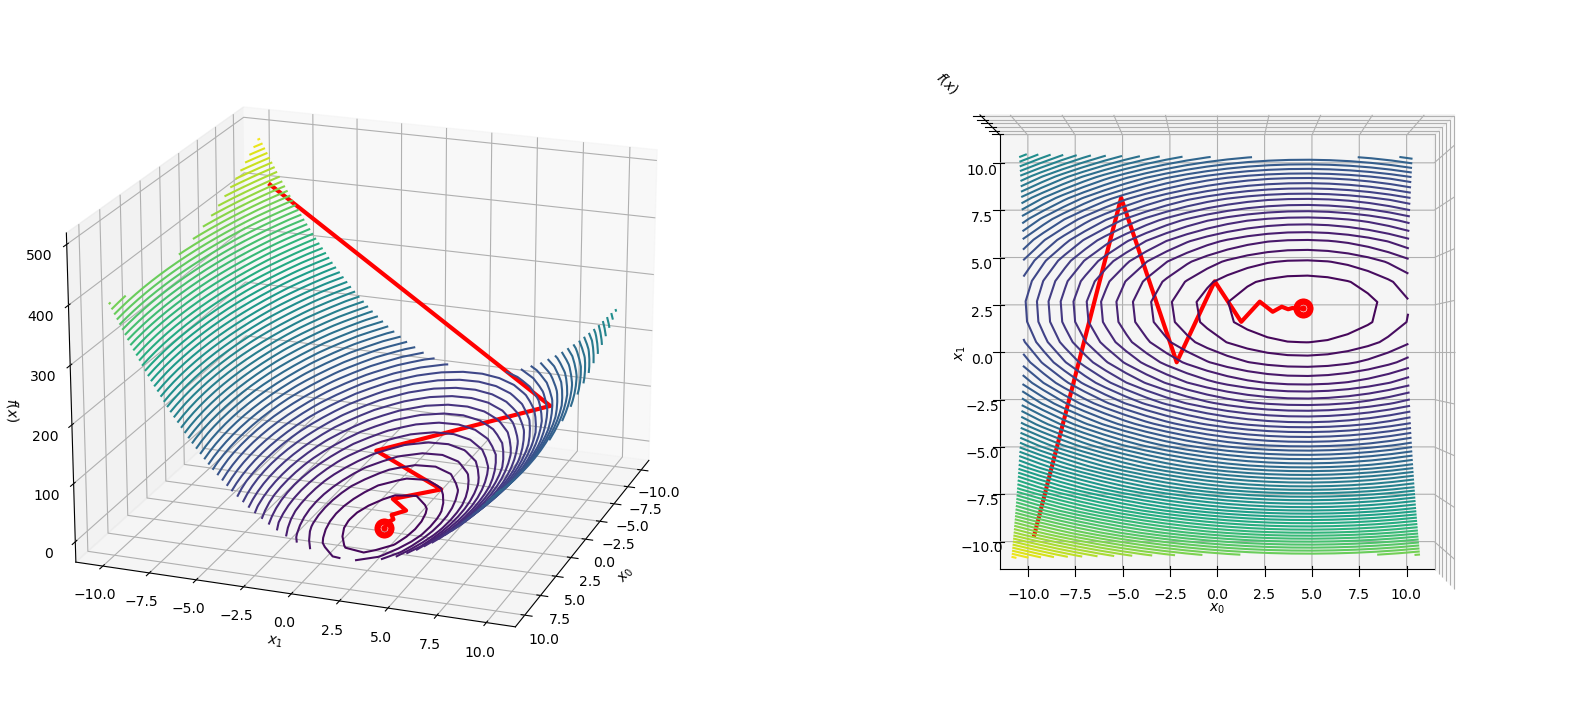

In [52]:
# Steepest descent steps
X_estimate, Y_estimate = estimate[:, 0], estimate[:, 1] 
Z_estimate = f(np.array([X_estimate, Y_estimate]))

# Plot
fig = plt.figure(figsize=(20, 20))

# First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.plot(X_estimate, Y_estimate, Z_estimate, color='red', linewidth=3)
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.view_init(20, 20)

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour3D(X, Y, Z, 60, cmap='viridis')
ax.plot(X_estimate, Y_estimate, Z_estimate, color='red', linewidth=3)
ax.scatter(min_x0, min_x1, min_z, marker='o', color='red', linewidth=10)
ax.set_xlabel('$x_{0}$')
ax.set_ylabel('$x_{1}$')
ax.set_zlabel('$f(x)$')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(90, -90);

Reference: https://towardsdatascience.com/implementing-the-steepest-descent-algorithm-in-python-from-scratch-d32da2906fe2